Per prima cosa, stampiamo i risultati della simulazione di dinamica molecolare: 

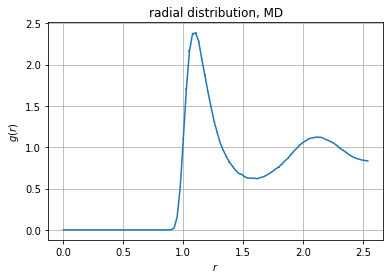

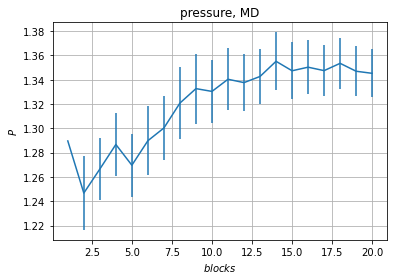

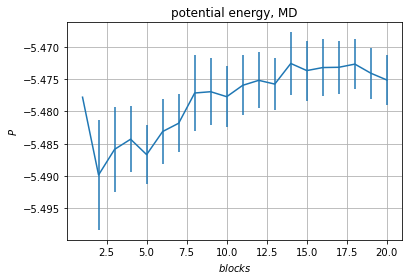

In [42]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

#load and plot data 
z =np.loadtxt("NSL_SIMULATOR/OUTPUT/gofr_MD.dat")
z.reshape(-1,3)
x1 = z[:,0]
y1 = z[:,1]
err1 = z[:,2]

plt.title("radial distribution, MD")
plt.xlabel("$r$")
plt.ylabel("$g(r)$")
plt.errorbar(x1, y1, yerr = err1)
plt.grid(True)
plt.show()

z =np.loadtxt("NSL_SIMULATOR/OUTPUT/pressure_MD.dat")
z.reshape(-1,4)
x = z[:,0]
y = z[:,2]
err = z[:,3]
plt.title("pressure, MD")
plt.xlabel("$blocks$")
plt.ylabel("$P$")
plt.errorbar(x, y, yerr = err)
plt.grid(True)
plt.show()

z =np.loadtxt("NSL_SIMULATOR/OUTPUT/potential_energy_MD.dat")
z.reshape(-1,4)
x = z[:,0]
y = z[:,2]
err = z[:,3]
plt.title("potential energy, MD")
plt.xlabel("$blocks$")
plt.ylabel("$P$")
plt.errorbar(x, y, yerr = err)
plt.grid(True)
plt.show()

E ora i risultati ottenuti campionando il peso di Boltzmann con l'algoritmo di metropolis: 

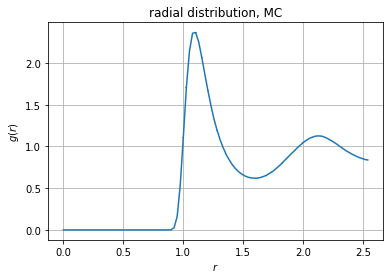

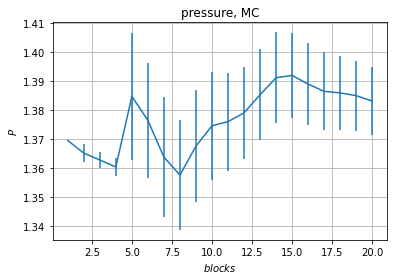

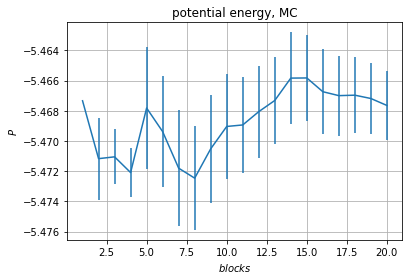

In [43]:
#load and plot data 
z =np.loadtxt("NSL_SIMULATOR/OUTPUT/gofr_MC.dat")
z.reshape(-1,3)
x = z[:,0]
y2 = z[:,1]
err2 = z[:,2]


plt.title("radial distribution, MC")
plt.xlabel("$r$")
plt.ylabel("$g(r)$")
plt.errorbar(x, y2, yerr = err2)
plt.grid(True)
plt.show()

z =np.loadtxt("NSL_SIMULATOR/OUTPUT/pressure_MC.dat")
z.reshape(-1,4)
x = z[:,0]
y = z[:,2]
err = z[:,3]
plt.title("pressure, MC")
plt.xlabel("$blocks$")
plt.ylabel("$P$")
plt.errorbar(x, y, yerr = err)
plt.grid(True)
plt.show()

z =np.loadtxt("NSL_SIMULATOR/OUTPUT/potential_energy_MC.dat")
z.reshape(-1,4)
x = z[:,0]
y = z[:,2]
err = z[:,3]
plt.title("potential energy, MC")
plt.xlabel("$blocks$")
plt.ylabel("$P$")
plt.errorbar(x, y, yerr = err)
plt.grid(True)
plt.show()

Osserviamo che, per quanto riguarda la temperatura e la pressione, le due misure sono compatibili, come ci aspettavamo. Invece, per quanto riguarda la distribuzione radiale $g(r)$, occorre eseguire un test del  $\chi^2$: 

chi quadro: 306.6689


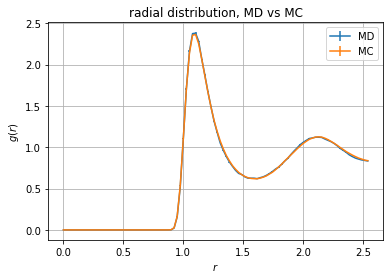

In [51]:
#check when error is zero 
valid = (err1**2 + err2**2) != 0


x_valid = x1[valid]
y1_valid = y1[valid]
y2_valid = y2[valid]
err1_valid = err1[valid]
err2_valid = err2[valid]

#compute chi2 
chi2 = np.sum((y1_valid - y2_valid)**2 / (err1_valid**2 + err2_valid**2))


#plot results 
plt.title("radial distribution, MD vs MC")
plt.xlabel("$r$")
plt.ylabel("$g(r)$")
plt.errorbar(x1, y1, yerr = err1, label = 'MD')
plt.errorbar(x1, y2, yerr = err2, label = 'MC')
plt.legend()
plt.grid(True)



print(f"chi quadro: {chi2:.4f}")

Che Ã¨ circa $3N_{bins}$: le distribuzioni sono comunque statisticamente compatibili. 

Tutte le misure sono state effettuate con $N_{blocks} =20$, con $2 \cdot 10^3$ step ciascuno.